In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 468s 3us/step


In [3]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5478 - accuracy: 0.4331 - val_loss: 1.2537 - val_accuracy: 0.5514
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.1838 - accuracy: 0.5775 - val_loss: 1.0660 - val_accuracy: 0.6202
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0355 - accuracy: 0.6350 - val_loss: 0.9960 - val_accuracy: 0.6469
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9418 - accuracy: 0.6716 - val_loss: 0.9661 - val_accuracy: 0.6597
Epoch 5/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8738 - accuracy: 0.6931 - val_loss: 0.9051 - val_accuracy: 0.6863
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8197 - accuracy: 0.7133 - val_loss: 0.9017 - val_accuracy: 0.6908
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7750 - accuracy: 0.7291 - val_loss: 0.8503 - va

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.8979 - accuracy: 0.7038
Test accuracy: 0.7038000226020813


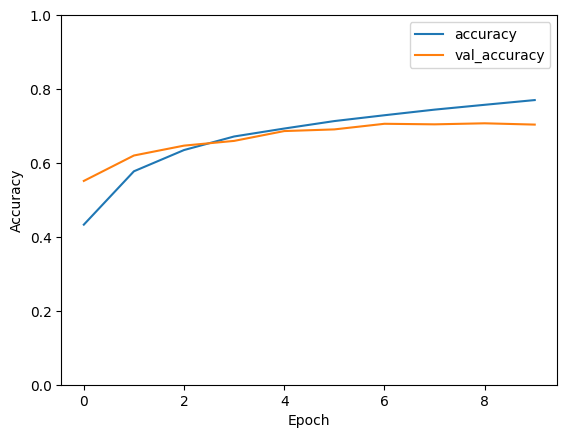

In [7]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()